In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
#reading data from csv

probabilities = pd.read_csv('df_probabilities_100.csv')
probabilities = probabilities['0'].to_list()

g_res = pd.read_csv('df_g_res_100.csv')
generation = g_res.drop('Unnamed: 0', axis = 1).loc[0].to_list()

In [4]:
#setting demand and prices

demand = 10
p_lt = 1
p_rt = 3

In [5]:
model = gp.Model()

setup = GurobiSolution(model, 
                        probabilities = probabilities,
                        generation = generation)

In [6]:
setup.build_centralized_2stage_model(demand=demand,
                                        p_lt=p_lt,
                                        p_rt = p_rt)

In [7]:
model.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 100 rows, 101 columns and 200 nonzeros
Model fingerprint: 0xef05579f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-04, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Presolve time: 0.00s
Presolved: 100 rows, 101 columns, 200 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.255225e+02   0.000000e+00      0s
       3    9.9639126e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.963912561e+00


In [8]:
model.getVars()

[<gurobi.Var long term purchase (value 9.8891)>,
 <gurobi.Var real time purchase[0] (value 0.11090000000000089)>,
 <gurobi.Var real time purchase[1] (value 0.05545000000000044)>,
 <gurobi.Var real time purchase[2] (value 0.0)>,
 <gurobi.Var real time purchase[3] (value 0.0)>,
 <gurobi.Var real time purchase[4] (value 0.0)>,
 <gurobi.Var real time purchase[5] (value 0.0)>,
 <gurobi.Var real time purchase[6] (value 0.0)>,
 <gurobi.Var real time purchase[7] (value 0.0)>,
 <gurobi.Var real time purchase[8] (value 0.0)>,
 <gurobi.Var real time purchase[9] (value 0.0)>,
 <gurobi.Var real time purchase[10] (value 0.0)>,
 <gurobi.Var real time purchase[11] (value 0.0)>,
 <gurobi.Var real time purchase[12] (value 0.0)>,
 <gurobi.Var real time purchase[13] (value 0.0)>,
 <gurobi.Var real time purchase[14] (value 0.0)>,
 <gurobi.Var real time purchase[15] (value 0.0)>,
 <gurobi.Var real time purchase[16] (value 0.0)>,
 <gurobi.Var real time purchase[17] (value 0.0)>,
 <gurobi.Var real time purcha

In [9]:
model.display()

Minimize
<gurobi.LinExpr: long term purchase + 0.5056459220719818 real time purchase[0]
+ 0.3378977159029185 real time purchase[1] + 0.41473942997627283 real time purchase[2]
+ 0.22169177553529051 real time purchase[3] + 0.1350733255195677 real time purchase[4]
+ 0.0909922529373087 real time purchase[5] + 0.0962236642748919 real time purchase[6]
+ 0.0619193276350017 real time purchase[7] + 0.0338755324318914 real time purchase[8]
+ 0.0285583602527085 real time purchase[9] + 0.028043795203109997 real time purchase[10]
+ 0.0217832537663301 real time purchase[11] + 0.0267573825791142 real time purchase[12]
+ 0.0249564049055199 real time purchase[13] + 0.0277865126783109 real time purchase[14]
+ 0.026585860895914804 real time purchase[15]
+ 0.0219547754495295 real time purchase[16] + 0.0242703181727223 real time purchase[17]
+ 0.0235842314399244 real time purchase[18] + 0.0204968411423343 real time purchase[19]
+ 0.0194677110431376 real time purchase[20] + 0.0223835796575283 real time purc

In [10]:
test_1 = np.random.normal(20, 5, 100000)
test_2 = np.random.normal(40, 9, 100000)
test_3 = np.random.normal(60, 12, 100000)

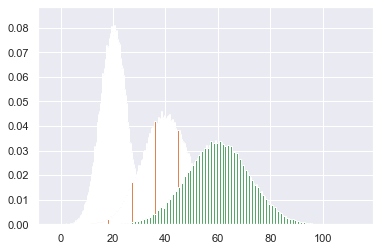

In [11]:
probas_1, values_1, _ = plt.hist(test_1, bins=200, density=True)
probas_2, values_2, _ = plt.hist(test_2, bins=200, density=True)
probas_3, values_3, _ = plt.hist(test_3, bins=200, density=True)

probas_1 = probas_1 / probas_1.sum()
probas_2 = probas_2 / probas_2.sum()
probas_3 = probas_3 / probas_3.sum()

In [12]:
a_1 = stats.rv_histogram([probas_1, values_1])
a_2 = stats.rv_histogram([probas_2, values_2])
a_3 = stats.rv_histogram([probas_3, values_3])

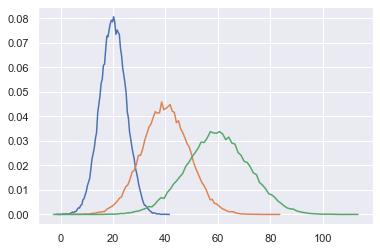

In [13]:
fig, ax = plt.subplots()

ax.plot(np.linspace(*a_1.support(), 100), a_1.pdf(np.linspace(*a_1.support(), 100)))
ax.plot(np.linspace(*a_2.support(), 100), a_2.pdf(np.linspace(*a_2.support(), 100)))
ax.plot(np.linspace(*a_3.support(), 100), a_3.pdf(np.linspace(*a_3.support(), 100)))

fig;

In [14]:
seller_1 = Seller(probas_1, values_1, wager=100)
seller_2 = Seller(probas_2, values_2, wager=100)
seller_3 = Seller(probas_3, values_3, wager=100)

sellers = [seller_1, seller_2, seller_3]

MarketOperator.plot_forecasts(sellers, scale = False)

AttributeError: type object 'MarketOperator' has no attribute 'plot_forecasts'

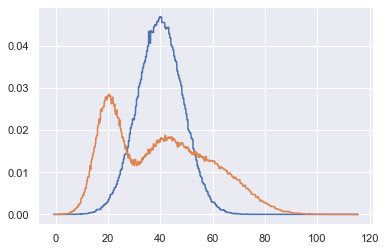

In [ ]:
qa_forecast = MarketOperator.aggregation(sellers, type = 'QA', plot = True, scale = False)
lop_forecast = MarketOperator.aggregation(sellers, type = 'LOP', plot = True, scale = False)

In [ ]:
qa_forecast.support()

(-1.776452318194219, 79.50682608318452)

In [ ]:
task = 40

MarketOperator.scoring(qa_forecast, task)

2.020139746510858

In [ ]:
MarketOperator.scoring(lop_forecast, task)

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


5.201740698609056

In [ ]:
#plt.plot(np.linspace(*lop_forecast.support(), 1000), lop_forecast.cdf(np.linspace(*lop_forecast.support(), 1000)))
#plt.plot(np.linspace(*qa_forecast.support(), 1000), qa_forecast.cdf(np.linspace(*qa_forecast.support(), 1000)))

In [ ]:
MarketOperator.scoring(seller_1.forecast_rv, task)

17.16771315342372

In [ ]:
MarketOperator.scoring(seller_2.forecast_rv, task)

2.100458780701821

In [ ]:
MarketOperator.scoring(seller_3.forecast_rv, task)

13.71642163026508

In [ ]:
MarketOperator.scoring(seller_2.forecast_rv, task) / MarketOperator.scoring(seller_3.forecast_rv, task)

0.153134602983273

In [ ]:
def distribution(probabilities, values):
    dist = stats.rv_histogram([probabilities, values])

    return dist

In [ ]:
b_1 = distribution(*a_1)
b_2 = distribution(*a_2)
b_3 = distribution(*a_3)

In [ ]:
quantiles = np.linspace(0, 1, 3000)

In [ ]:
ppf_sum = b_1.ppf(quantiles) + b_2.ppf(quantiles) + b_3.ppf(quantiles)

def func_1(*quantile):
    ppf_total = 0.33*(b_1.ppf(*quantile) + b_2.ppf(*quantile) + b_3.ppf(*quantile))
    return ppf_total

In [ ]:
from scipy.stats import rv_continuous

class my_rv(rv_continuous):
    def _ppf(self, x):
        return func_1(x)

In [ ]:
rv = my_rv()

new_data = rv.rvs(size=1000000)


In [ ]:
np.histogram(new_data, bins = 200)[2]

IndexError: tuple index out of range

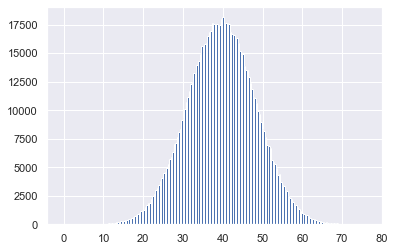

In [ ]:
probas_res, values_res, _ = plt.hist(new_data, bins = 200)

In [ ]:
new_rv = stats.rv_histogram([probas_res, values_res])

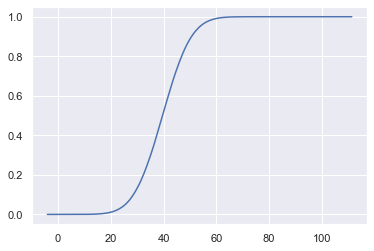

In [ ]:
plt.plot(supp, new_rv.cdf(supp))

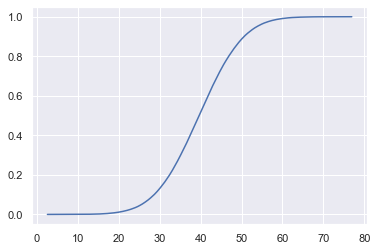

In [ ]:
plt.plot(func_1(quantiles), quantiles)

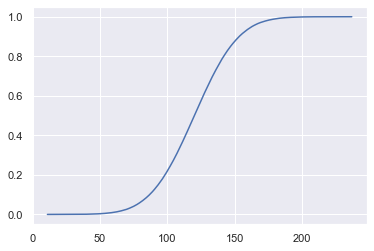

In [ ]:
plt.plot(ppf_sum, quantiles);

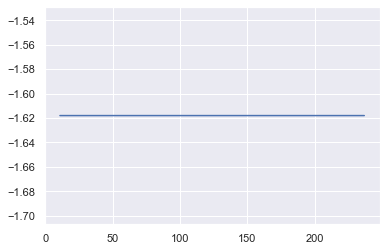

In [ ]:
plt.plot(ppf_sum, cdf)

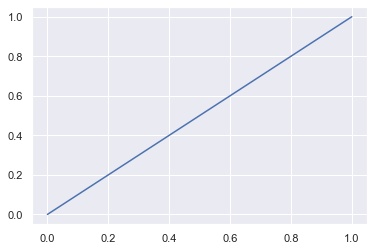

In [ ]:
plt.plot(quantiles, b_1.cdf(b_1.ppf(quantiles)))

In [ ]:
a_1.support()

(-1.7858707348274052, 43.09185245455925)